In [1]:
import oritelib as orite
import numpy  as np
import matplotlib.pyplot as plt

In [2]:
og_seq = orite.seq_from_fasta("test_data/exciting_bacteria/Agrobacterium_fabrum_L1_FASTA.fasta")
nc_intervals = orite.genbank_to_non_coding_intervals("test_data/exciting_bacteria/Agrobacterium_fabrum_L1_GB.gb")
og_gc, og_cgc = orite.gc_skew_sliding_window(og_seq, 250000)

In [3]:
max_things = orite.max_rotate_seq_and_skew_calc(og_seq, window_radius=250000)

inital max gc skew indx 1153538
max cgc skew indx 235836


In [4]:
max_cg = max_things[0]
max_cgc = max_things[1]
max_fasta = max_things[2]
max_offset = max_things[3]

In [5]:
nc_intervals_list =nc_intervals[0]

In [6]:
def get_phased_nc_region_list(nc_intervals, og_fasta, max_offset, max_cgc):
    nc_objects = orite.nc_intervals_to_nc_objects(nc_intervals, og_fasta)
    phased_nc_objects = orite.add_max_relative_position(nc_objects, len(og_fasta), max_offset)
    max_scored_nc_objects = orite.calc_score_over_region_list(phased_nc_objects, max_cgc, rotated = True)
    return max_scored_nc_objects
    

In [7]:
x0 = get_phased_nc_region_list(nc_intervals_list, og_seq, max_offset, max_cgc)

In [8]:
#nc_region_list = orite.nc_intervals_to_nc_objects(nc_intervals_list)

In [9]:
len(x0)

2326

In [10]:
x1 = orite.get_kmers_from_region_list(x0, [7,8,9])
len(x1)

2326

In [11]:
x1[4].kmer_info

{7: [('GCGCTAG', [1, 95]),
  ('CGCGCTA', [1, 94]),
  ('ACGCGCT', [1, 93]),
  ('CACGCGC', [1, 92]),
  ('CCACGCG', [1, 91]),
  ('TCCACGC', [1, 90]),
  ('TTCCACG', [1, 89]),
  ('ATTCCAC', [1, 88]),
  ('CATTCCA', [1, 87]),
  ('CCATTCC', [1, 86]),
  ('TCCATTC', [1, 85]),
  ('ATCCATT', [1, 84]),
  ('CATCCAT', [1, 83]),
  ('CCATCCA', [1, 82]),
  ('GCCATCC', [1, 81]),
  ('CGCCATC', [1, 80]),
  ('TCGCCAT', [1, 79]),
  ('ATCGCCA', [1, 78]),
  ('CATCGCC', [1, 77]),
  ('TCATCGC', [1, 76]),
  ('GTCATCG', [1, 75]),
  ('CGTCATC', [1, 74]),
  ('GCGTCAT', [1, 73]),
  ('CGCGTCA', [1, 72]),
  ('TCGCGTC', [1, 71]),
  ('ATCGCGT', [1, 70]),
  ('GATCGCG', [1, 69]),
  ('TGATCGC', [1, 68]),
  ('CTGATCG', [1, 67]),
  ('CCTGATC', [1, 66]),
  ('TCCTGAT', [1, 65]),
  ('TTCCTGA', [1, 64]),
  ('CTTCCTG', [1, 63]),
  ('CCTTCCT', [1, 62]),
  ('CCCTTCC', [1, 61]),
  ('ACCCTTC', [1, 60]),
  ('AACCCTT', [1, 59]),
  ('CAACCCT', [1, 58]),
  ('ACAACCC', [1, 57]),
  ('TACAACC', [1, 56]),
  ('TTACAAC', [1, 55]),
  ('CTTACAA',

In [12]:
x2 = orite.filter_region_list_by_kmer_occurence(x1, 3)

In [13]:
x2[4].kmer_info

{7: [], 8: [], 9: []}

In [14]:
x3 = orite.filter_empty_kmer_regions(x2)

In [15]:
len(x3)

69

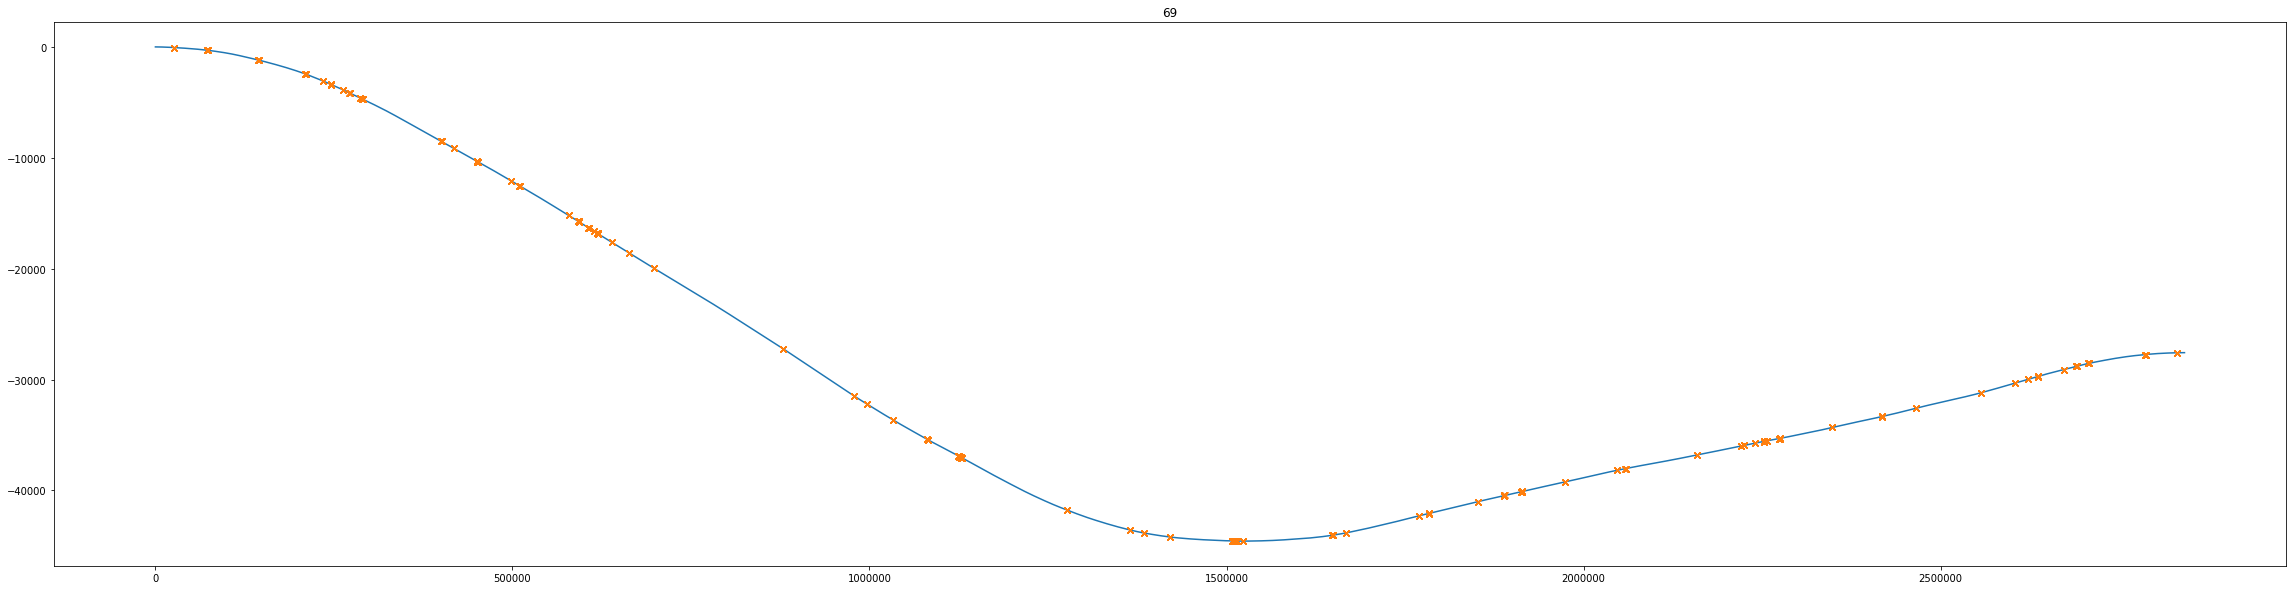

In [16]:
orite.plot_region_list(x3, max_cgc, rotated=True)

In [17]:
x4 = orite.filter_regions_by_length(x3, 50)
len(x4)

69

In [18]:
for region in x3:
    print(region.length)

3158
2606
663
1522
363
768
296
129
1048
442
321
249
601
344
260
175
213
432
953
318
121
152
506
459
228
271
544
139
251
505
1449
303
80
306
462
500
437
308
653
598
170
480
291
212
239
450
445
438
187
398
381
191
375
489
456
542
463
215
344
488
349
401
305
2606
2626
122
447
241
436
